Importing data set and performing exploratory data analysis

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, f1_score, accuracy_score, mean_squared_error, classification_report

In [3]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
print(data.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


Filling the missing values in the numeric features with the mean and the features selected are those with a small number of missing values.

In [6]:
features = ['Temp9am','Temp3pm','RainTomorrow','Humidity3pm','Humidity9am','WindSpeed3pm','WindSpeed9am',
            'WindDir3pm','WindDir9am','WindGustSpeed','WindGustDir','Rainfall','MaxTemp','MinTemp']

for feature in features:
  if data[feature].dtype != object:
    data[feature] = data[feature].fillna(data[feature].mean())

In [7]:
print(data.isnull().sum())

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64


The same thing  is done with the categorical data, but this time repalced the values with the most frequent value which is the mode.

In [8]:
features = ['RainToday','RainTomorrow','WindDir9am','WindDir3pm']

for feature in features:
  if feature == 'RainTomorrow':
    data.loc[:, feature] = data[feature].fillna('Yes')
  if data[feature].dtype == object:
    data.loc[:, feature] = data[feature].fillna(data[feature].mode()[0])
    
print(data.isnull().sum())

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64


For the WindGustDir feature the mode value is related to the 'nan' which means a null value, also replacing those values with the second mode in our case the 'W' value is not a good approach to use since the other classes's count is not very different from it. So 'W' class is not dominant to other classes. May be dropping the null values in this case would be a good solution.

In [9]:
data['WindGustDir'].mode()
Counter(data['WindGustDir'])

Counter({nan: 10326,
         'W': 9915,
         'SE': 9418,
         'N': 9313,
         'SSE': 9216,
         'E': 9181,
         'S': 9168,
         'WSW': 9069,
         'SW': 8967,
         'SSW': 8736,
         'WNW': 8252,
         'NW': 8122,
         'ENE': 8104,
         'ESE': 7372,
         'NE': 7133,
         'NNW': 6620,
         'NNE': 6548})

In [10]:
data = data.dropna(subset= 'WindGustDir')
print(data.isnull().sum())
data.head()
data.shape

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      57516
Sunshine         64047
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      10780
Pressure3pm      10739
Cloud9am         53582
Cloud3pm         55642
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64


(135134, 23)

 Features whose number of missing values is very large are remaining. Since we cannot estimate those values we may consider either dropping those features or evaluating models to predict the missing values.

 To check if those features are important or not, the correlation matrix would be a good metric.

<Axes: >

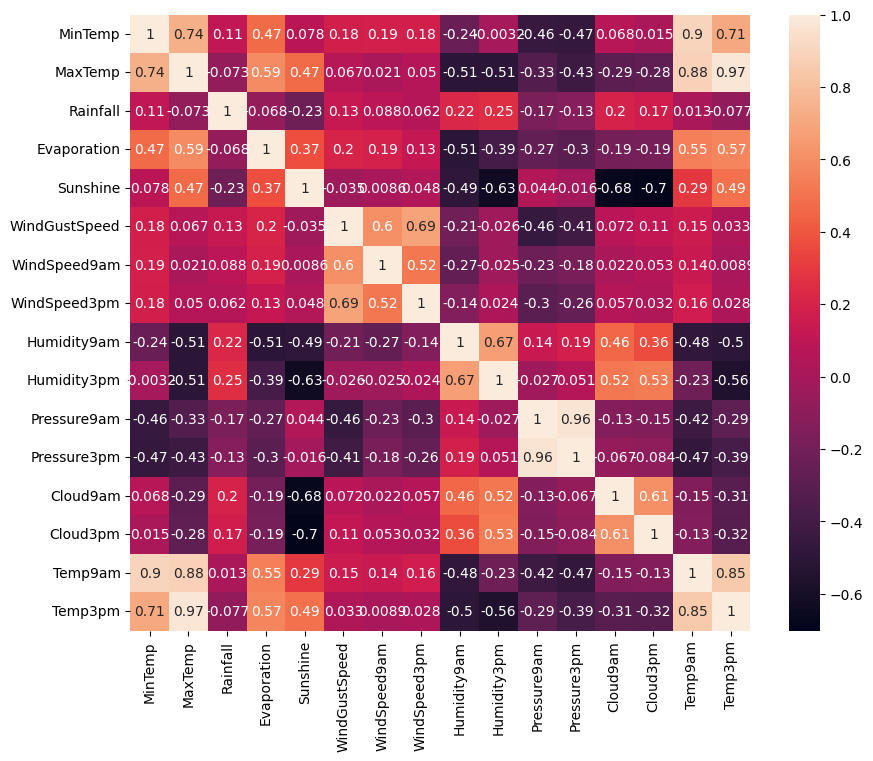

In [11]:
corr_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)

Those features don't have a strong correlation with each other, can drop them.

In [12]:
data = data.drop(columns=['Sunshine','Evaporation','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Date'])

In [13]:
print(data.isnull().sum())
data.shape

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


(135134, 16)

For the target variable Label Encoding is used to translate the categorical classes into numbers. In the other hand encoding the input features with the same approach wouldn't be convenient since their values to have a context based on the profile of each record hence Target encoding is used.

In [14]:
from category_encoders import TargetEncoder

X = data.drop('RainTomorrow',axis = 1)
Y = data['RainTomorrow']

label_encoder = LabelEncoder()

# Encode target variable
Y = label_encoder.fit_transform(Y)

In [15]:
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
encoder = TargetEncoder(cols=categorical_columns)

X_encoded = encoder.fit_transform(X, Y)

Random Forest Model

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, test_size= 0.2, random_state= 42)
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)

print('the accuracy score the random forest model : ',accuracy)
print('the classification report : ',report)

the accuracy score the random forest model :  0.8488548488548489
the classification report :                precision    recall  f1-score   support

           0       0.95      0.86      0.91     22766
           1       0.51      0.77      0.62      4261

    accuracy                           0.85     27027
   macro avg       0.73      0.82      0.76     27027
weighted avg       0.88      0.85      0.86     27027



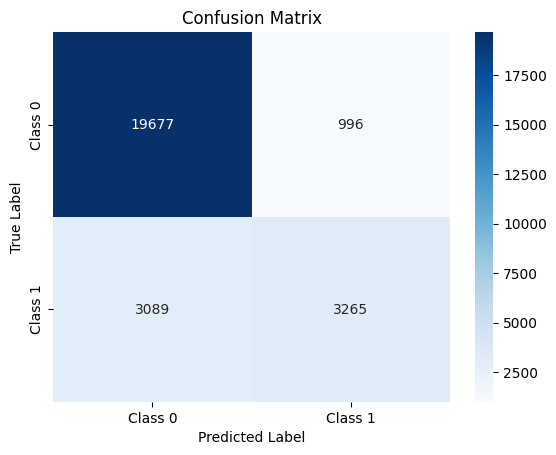

In [17]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],  # Replace with your class names
            yticklabels=['Class 0', 'Class 1'])  # Replace with your class names

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The target variable has imbalanced data, Hence we need to re-perform the test with balanced data. 
One of the solutions to solve this issue is by using ensemble learning techniques such as bagging and boosting. Xgboost can handle this type of issues

0.8164428164428165

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.87     20673
           1       0.59      0.75      0.66      6354

    accuracy                           0.82     27027
   macro avg       0.75      0.79      0.77     27027
weighted avg       0.84      0.82      0.82     27027

Confusion Matrix:


<Axes: >

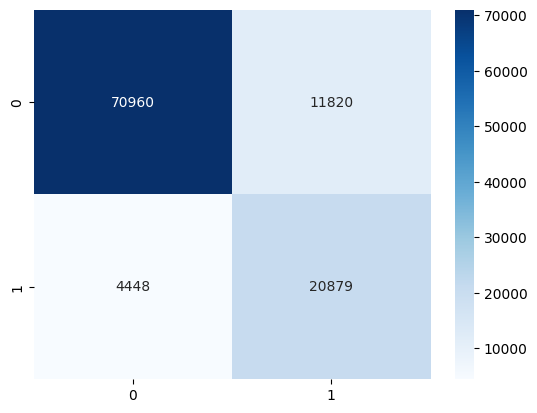

In [18]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

model = xgb.XGBClassifier(scale_pos_weight=103453/31681)  # Example weight based on class imbalance ratio

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

accuracy = accuracy_score(y_pred, y_test)
print(accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot = True, fmt='d', cmap='Blues')

Even after applying Xgboost only 58% of the class 1 values were correctly classified.
Over and under-sampling techniques are applied.1. So oversampling of class 1 and under-sampling of class 0 is done

0.8444888444888445

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     20673
           1       0.70      0.60      0.64      6354

    accuracy                           0.84     27027
   macro avg       0.79      0.76      0.77     27027
weighted avg       0.84      0.84      0.84     27027

Confusion Matrix of the training data :


<Axes: >

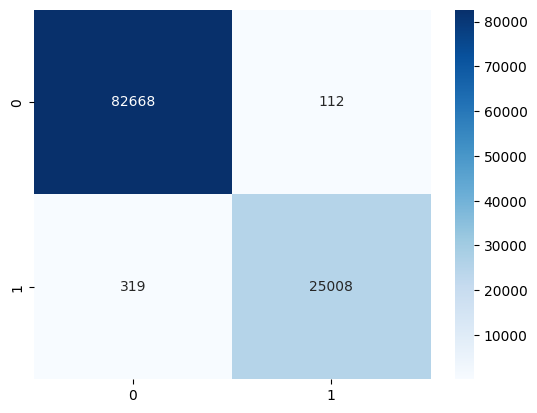

In [23]:
from imblearn.combine import SMOTETomek

x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

smote = SMOTETomek(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(x_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, Y_train_resampled)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix of the training data :")
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot = True, fmt='d', cmap='Blues')

KNN Classifier :

0.7336367336367337

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81     20673
           1       0.46      0.69      0.55      6354

    accuracy                           0.73     27027
   macro avg       0.67      0.72      0.68     27027
weighted avg       0.79      0.73      0.75     27027

Confusion Matrix:


<Axes: >

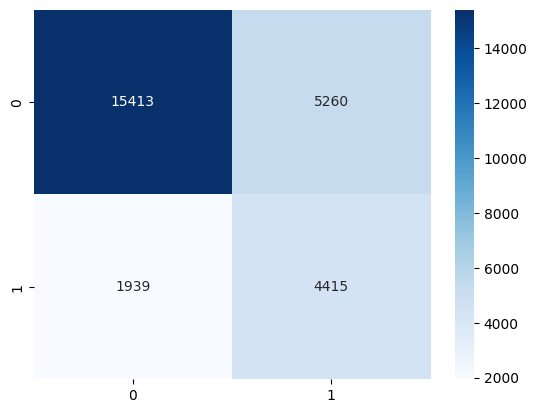

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek


x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

smote = SMOTETomek(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(x_train, y_train)

model = KNeighborsClassifier()
model.fit(X_train_resampled, Y_train_resampled)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues', fmt = 'd')

In [21]:
cv_score = cross_val_score(model, X_encoded, Y, scoring = 'accuracy')

print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.81659082 0.79287379 0.78517779 0.82199282 0.81969215]
the mean cross validation score :  0.8072654729873705


KNN model did a less good job compared to the Random Forest model, with both being in the default parameters.
Random Forest out perform the KNN model in both accuracy score and identifying correctly the Classes of the target variable. 